In [27]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [28]:
data = pd.read_csv(r"C:\Users\Murtuja afshar\OneDrive\Desktop\job\task 2\customer_segmentation_data1.csv")
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [33]:
data.describe()


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [34]:
print(data['preferred_category'].value_counts())

Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: preferred_category, dtype: int64


In [36]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['gender', 'preferred_category']


In [38]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [39]:
from sklearn.preprocessing import StandardScaler
features = ['age','income','spending_score','membership_years','purchase_frequency','preferred_category','last_purchase_amount']
x = data[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=features)
df.head()

,age,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-0.051028,-1.281540
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,1.386386,-1.523763
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-1.488442,-0.230005
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,0.667679,1.690080
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.769735,-0.491443


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 48 )
data['cluster'] = kmeans.fit_predict(df)
print(data.groupby('cluster')[features].mean())

               age        income  spending_score  membership_years  \
cluster                                                              
0        42.013378  96810.344482       49.575251          6.297659   
1        39.829341  92523.883234       52.059880          4.769461   
2        48.822888  78069.564033       50.337875          5.430518   

         purchase_frequency  preferred_category  last_purchase_amount  
cluster                                                                
0                 26.394649            0.715719            329.754181  
1                 25.661677            3.266467            317.351916  
2                 27.610354            2.087193            784.078011  


C:\Users\Murtuja afshar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


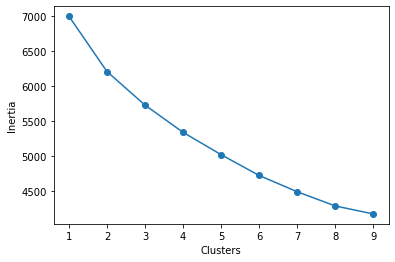

In [41]:
inertia = []
for k in range (1,10):
    kmeans = KMeans(n_clusters = k, random_state = 48 )
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

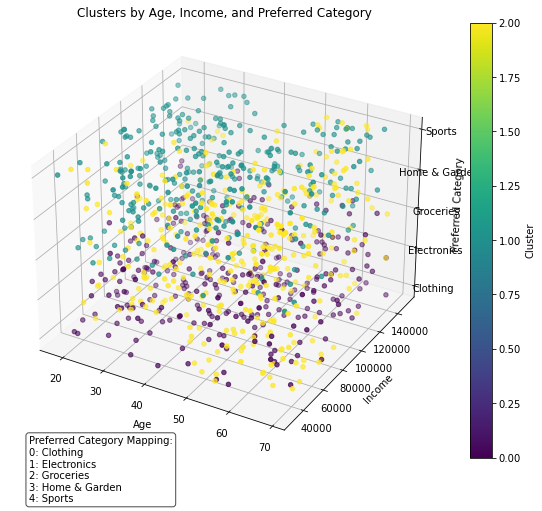

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['age'], data['income'], data['preferred_category'],
                     c=data['cluster'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Preferred Category')
ax.set_title('Clusters by Age, Income, and Preferred Category')

ticks = np.sort(data['preferred_category'].unique())  # Get unique encoded values
ax.set_zticks(ticks)  # Set tick positions
ax.set_zticklabels([category_mapping[int(t)] for t in ticks])  # Replace numbers with category names

cbar = plt.colorbar(scatter, label='Cluster')

category_text = "\n".join([f"{k}: {v}" for k, v in category_mapping.items()])
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text2D(0.05, 0.05, f"Preferred Category Mapping:\n{category_text}", transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.show()

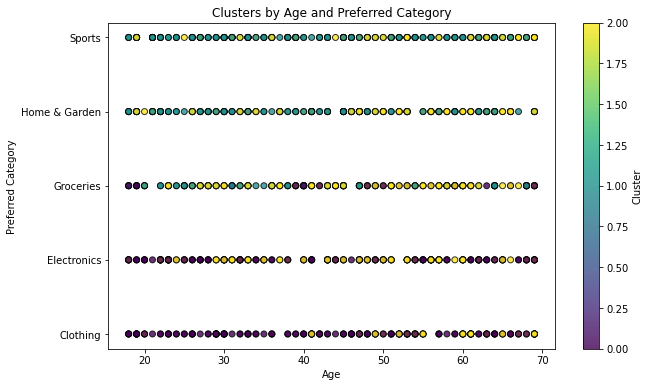

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(data['age'], data['preferred_category'], c=data['cluster'], cmap='viridis', alpha=0.8, edgecolors='k')

ax.set_xlabel('Age')
ax.set_ylabel('Preferred Category')
ax.set_title('Clusters by Age and Preferred Category')

ticks = np.sort(data['preferred_category'].unique())  
ax.set_yticks(ticks) 
ax.set_yticklabels([category_mapping[int(t)] for t in ticks]) 

plt.colorbar(scatter, label='Cluster')

plt.show()

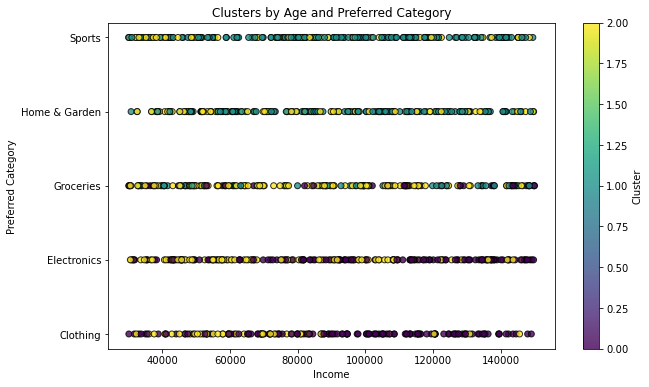

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(data['income'], data['preferred_category'], c=data['cluster'], cmap='viridis', alpha=0.8, edgecolors='k')

ax.set_xlabel('Income')
ax.set_ylabel('Preferred Category')
ax.set_title('Clusters by Age and Preferred Category')

ticks = np.sort(data['preferred_category'].unique())  
ax.set_yticks(ticks) 
ax.set_yticklabels([category_mapping[int(t)] for t in ticks]) 

plt.colorbar(scatter, label='Cluster')

plt.show()